<a href="https://colab.research.google.com/github/marlefuhr/Biomedical-Signal-Processing/blob/main/EEG-Seizure%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1C 2024
Procesamiento de Señales Biomédicas

Fecha: 25/06/2024

Alumnas:


*   Fuhr, Marlene - 62858







## Introducción

### Marco teorico

Un **electroencefalograma (EEG)** es un estudio que mide la actividad eléctrica en el cerebro mediante pequeños discos de metal (electrodos) colocados sobre el cuero cabelludo. Las neuronas cerebrales se comunican a través de impulsos eléctricos y están activas todo el tiempo, incluso mientras duermes. Esta actividad se manifiesta como líneas onduladas en un registro electroencefalográfico.

Para abordar la variabilidad en la forma y el tamaño de los cráneos humanos y obtener resultados comparables en los estudios de EEG, se implementa el sistema 10/20. Este sistema se refiere a la colocación de electrodos en la cabeza siguiendo proporciones del 10% y 20% respecto a las medidas generales del cráneo en los planos anteroposterior, sagital y axial.
El objetivo es que los electrodos estén equidistantes, lo cual es esencial para obtener señales de EEG precisas y comparables para su posterior análisis. Los electrodos se clasifican en cinco categorías, cada una indicando su posición en el cráneo:

F: Frontal
T: Temporal
C: Central
P: Parietal
O: Occipital

Este método asegura que la colocación de los electrodos sea sistemática y consistente entre diferentes sujetos, permitiendo así un análisis preciso y fiable de las señales EEG.

Además, las ondas cerebrales registradas por los electrodos se clasifican en diferentes ritmos, cada uno con características específicas y significados asociados:


*   Ondas Delta (0.5-4 Hz): Comúnmente observadas durante el sueño profundo.
*  Ondas Theta (4-8 Hz): Asociadas con estados de somnolencia, meditación y sueño ligero
*  Ondas Alpha (8-13 Hz): Predominan en estados de relajación y durante la vigilia tranquila con los ojos cerrados.
*   Ondas Beta (13-30 Hz): Relacionadas con la actividad mental intensa y estados de alerta.
*   Ondas Gamma (30-100 Hz): Involucradas en procesos cognitivos complejos y la percepción consciente.



Un electroencefalograma es uno de los estudios principales para diagnosticar la **epilepsia**, trastorno cerebral en el cual la persona tiene convulsiones repetidas en el tiempo. Las convlulsiones son episodios de actividad eléctrica descontrolada y anormal, debido a una actividad neuronal anormal, excesiva o sincrónica en el cerebro.

La característica principal de la enfermadad son las crisis epilépticas. Estas se asocian con diversas consecuencias negativas para la salud del paciente, a corto y largo plazo. Entre ellas, se incluyen cambios en la atención o el comportamiento (como movimientos corporales), el riesgo de caídas y lesiones, déficitis cognitivos y eventualmente, la muerte.

Existen tratamientos farmacológicos y quirúrgicos, en general pueden detener o controlar las convulsiones. Sin embargo, el uso de  drogas anticonvulsivas tiene limitaciones y efectos secundarios, incluso fallan en controlar las convulsiones hasta en el 30% de los casos. Además, el tratamiento quirurgico no puede aplicarse en todos los casos.

De las limitaciones de los tratamientos surge la importancia de la predicción de las convulsiones. Una predicción temprana puede permitir al paciente y a sus cuidadores tomar acciones preventivas adecuadas. Por ejemplo, generar una alarma, aplicar drogas de acción corta o activar dispositivos de estimulación.


### Estado del arte

Este trastorno neurológico afecta a alrededor de 65 millones de personas en todo el mundo. Los métodos de predicción, normalmente basados en métodos de aprendizaje automático, requieren una gran cantidad de datos de entrenamiento para
clasificar correctamente las convulsiones con pequeñas tasas de falsas alarmas. En el articulo brindado aborda esta tematica [EEG Synchronization Analysis for Seizure Prediction: A Study on Data of Noninvasive Recordings](https://www.mdpi.com/2227-9717/8/7/846).

Predecir una crisis epiléptica significa la capacidad de determinar de antemano el momento
de una crisis con la mayor precisión posible. Un pronóstico correcto de un evento epiléptico
en aplicaciones clínicas es un problema típico en procesamiento de senales biomédicas, lo
cual ayuda a un diagnóstico y tratamiento apropiado de esta enfermedad.



### Objetivos del trabajo

El requisito del trabajo era procesar la base de datos incluyendo el uso de segmentacion de EEG y estimadores.

El objetivo principal de este informe es aplicar el procesamiento de señales para poder acondicionar la señal para diseñar y evaluar un algoritmo que permita detectar el inicio y el fin de convulsiones en señales EEG mediante el uso combinado de autocorrelación y la identificación de máxima potencia en la densidad espectral de potencia (PSD).


### Materiales y métodos


La base de datos, [Siena Scalp EEG Database](https://physionet.org/content/siena-scalp-eeg/1.0.0/)
, consta de 14 carpetas que contienen registros de EEG en formato de datos europeo (EDF) de pacientes epilépticos.
La Unidad de Neurología y Neurofisiología de la Universidad de Siena, Italia, adquirió los datos de 14 pacientes epilépticos, recopilados durante el proyecto de investigación nacional interdisciplinario PANACEE, con el objetivo de describir, detectar y predecir en un tiempo suficientemente corto las crisis epilépticas y transiciones entre vigilia y sueño.


 Los datos contienen registros de la actividad cerebral (EEG) de sujetos patológicos adquiridos con un video EEG del cuero cabelludo con una frecuencia de muestreo de 512 Hz, con electrodos dispuestos según el sistema internacional 10-20. La mayoría de las grabaciones también contienen señales de electrocardiograma.

Aunque mediante los EEG no invasivos (cuero cabelludo) se obtienen señales mas "ruidosas" que aquellas obtenidas de forma invasiva (técnica intracranial), se trabaja con señales adquiridas de esta forma para permitir el uso en tiempo real del método desarrollado, mediante dispositivos portables y minima incomodidad para el paciente.

En el presente informe se eligio a un subgrupo de pacientes. En particular se trabajo con PN17, PN11,PN10 y PN00. Los cuales presentan sintomas de convulsiones en la region temporal derecha.

## Desarrollo


1.   Preprocesamiento de Señales EEG: Filtrar las señales
EEG para eliminar el ruido y las componentes no deseadas, preservando las características relevantes para la detección de convulsiones.
2.  Cálculo de la Autocorrelación: Analizar la autocorrelación de las señales EEG para identificar patrones repetitivos y eventos significativos que puedan indicar la presencia de convulsiones.
3.   Análisis de la Densidad Espectral de Potencia (PSD): Utilizar el método de Welch para estimar la PSD de las señales EEG y detectar la frecuencia de máxima potencia, asociada con eventos anómalos como convulsiones.
4.   Filtrado de la señal EEG en el rango de frecuencia alfa (8-13 Hz) utilizando un filtro FIR pasa banda.
5.   Integración de Resultados: Combinar la información obtenida de la autocorrelación y la PSD para desarrollar un criterio de detección robusto que permita identificar con precisión el inicio y el fin de las convulsiones.
6.   Visualización y Validación: Visualizar los resultados del análisis y validar la precisión del algoritmo mediante la comparación con datos etiquetados manualmente sacados de la información brindada en la base de datos.





### Instalación de librerías y Drive

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar librerias
from mne import io
import mne
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.fft import fft
from scipy.signal import welch
from scipy.fft import fft
from scipy.signal import hilbert, firwin, lfilter
from scipy.signal import iircomb, filtfilt, iirnotch
from scipy.signal import spectrogram

### Cargar muestras

In [ ]:
path = r'/content/drive/MyDrive/Procesamiento PSIB/TP PSIB/señales/PN17-1.edf'
raw0 = io.read_raw_edf(path)

print(raw0.ch_names) # Ver qué canales tiene


Extracting EDF parameters from /content/drive/MyDrive/Procesamiento PSIB/TP PSIB/señales/PN17-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Pz', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'SPO2', 'HR', '1', '2', 'EEG FP2', 'EEG P9', 'EEG P10', 'PLET', '61', '62', '63', '64', 'EEG T3', 'EEG CZ', '3', '23', '33', '31', 'A', 'B', 'C', 'D', 'MK']


<ipython-input-5-88985031377b>:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw0 = io.read_raw_edf(path)
<ipython-input-5-88985031377b>:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw0 = io.read_raw_edf(path)
<ipython-input-5-88985031377b>:2: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw0 = io.read_raw_edf(path)


En la base de datos se incluian otras señales además de las de EEG, es por esto que se dividio a la información de la señal. Para así quedarnos solo con las de interes.

In [ ]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EEG FP2', 'EEG P9', 'EEG P10']

eeg_present = [ch for ch in eeg_channels if ch in raw0.ch_names]

print("Canales de EEG presentes en el archivo:\n", eeg_present)
eeg_raw = raw0.copy().pick_channels(eeg_present)
print("Canales de EEG seleccionados:\n", eeg_raw.ch_names)


Canales de EEG presentes en el archivo:
 ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Pz', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EEG FP2', 'EEG P9', 'EEG P10']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Canales de EEG seleccionados:
 ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Pz', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EEG FP2', 'EEG P9', 'EEG P10']


In [ ]:
data = eeg_raw.get_data()
print(data)

print('/n')
print("Canales x samples")
print(data.shape)


[[-5.3750e-06 -5.7500e-06 -1.6250e-06 ...  8.2500e-06  9.0000e-06
   8.7500e-06]
 [ 3.5000e-06  9.1250e-06  8.3750e-06 ...  1.0125e-05  9.7500e-06
   7.2500e-06]
 [-1.0000e-06  2.1250e-06  1.4250e-05 ...  5.2500e-06  4.2500e-06
   6.2500e-07]
 ...
 [ 1.0375e-05 -2.7500e-06 -5.8750e-06 ...  6.0000e-06  2.3750e-06
   4.7500e-06]
 [ 7.6250e-06 -4.7500e-06 -1.4750e-05 ...  2.1625e-05  5.6250e-06
  -2.0000e-05]
 [ 2.2875e-05  1.2875e-05 -2.8750e-06 ...  9.5000e-06 -1.1625e-05
  -4.2000e-05]]
/n
Canales x samples
(30, 4749824)


In [ ]:
fs = eeg_raw.info['sfreq'] # Obtener la frecuencia de muestreo
print("Frecuencia de muestreo", fs)


Frecuencia de muestreo 512.0


In [ ]:
print(f'En el registro hay {data.shape[1]/fs} segundos ({data.shape[1]/fs/60} mins) de registro')
print(f'En el registro hay {len(eeg_raw.ch_names)} canales registrados')


En el registro hay 9277.0 segundos (154.61666666666667 mins) de registro
En el registro hay 30 canales registrados


### Graficas

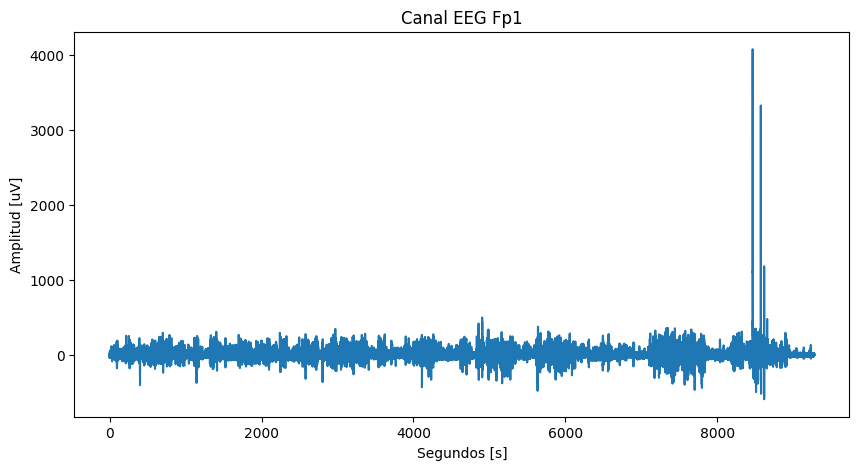

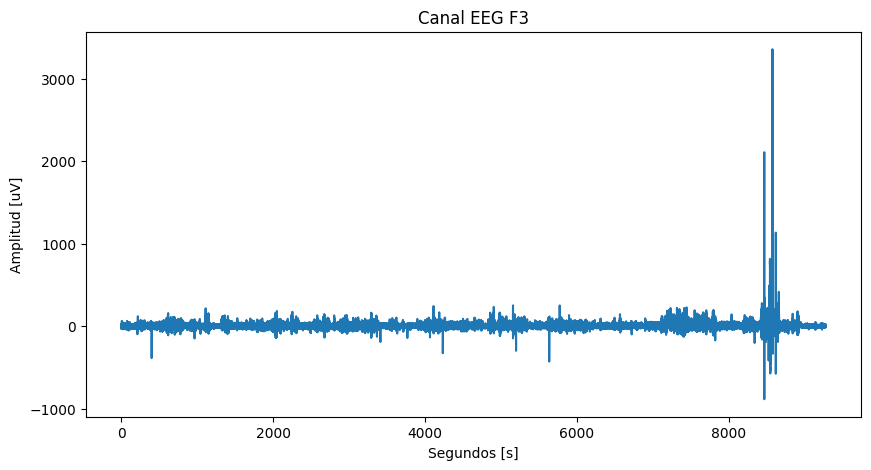

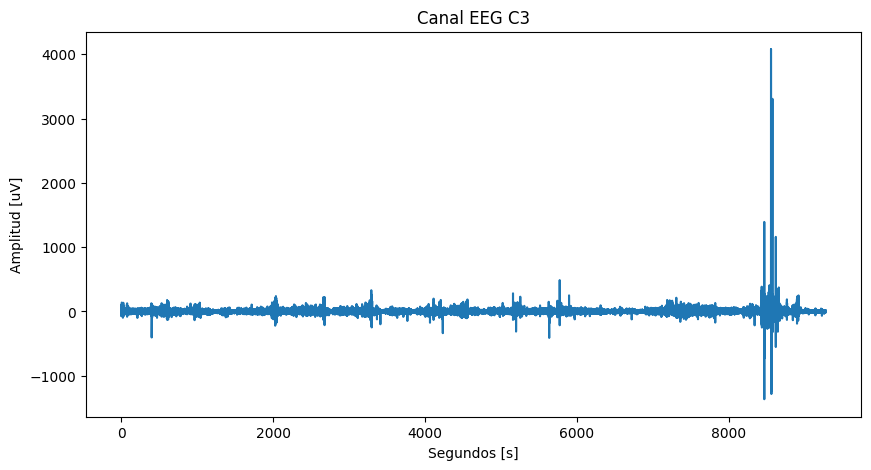

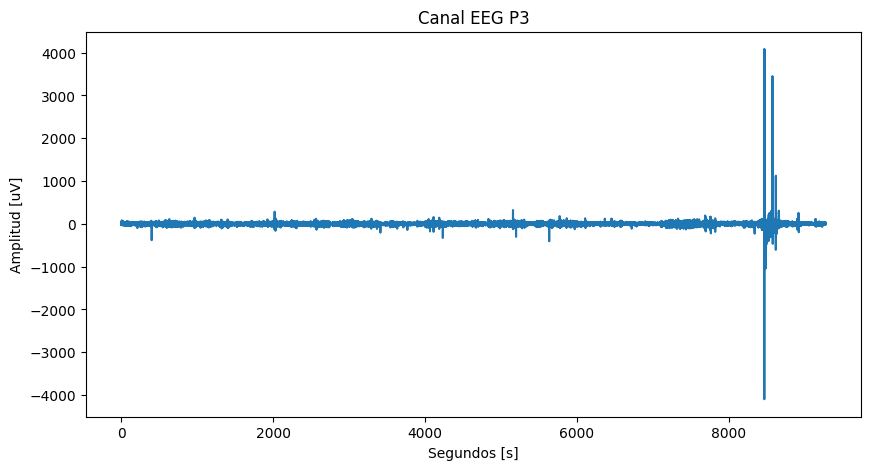

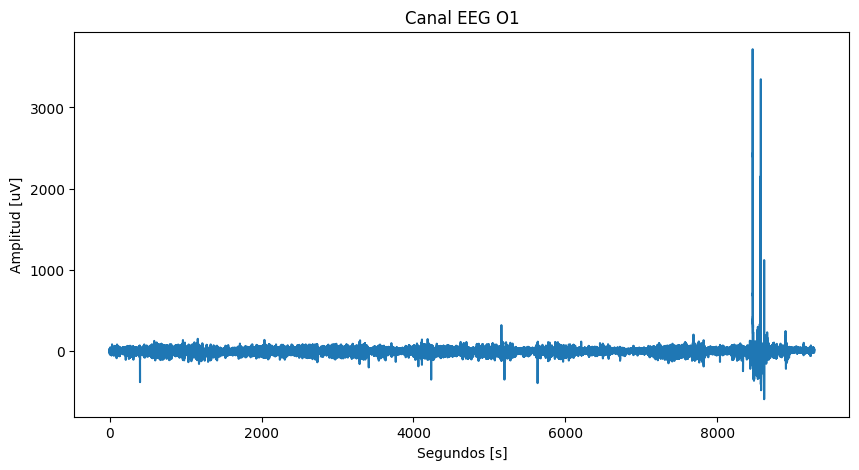

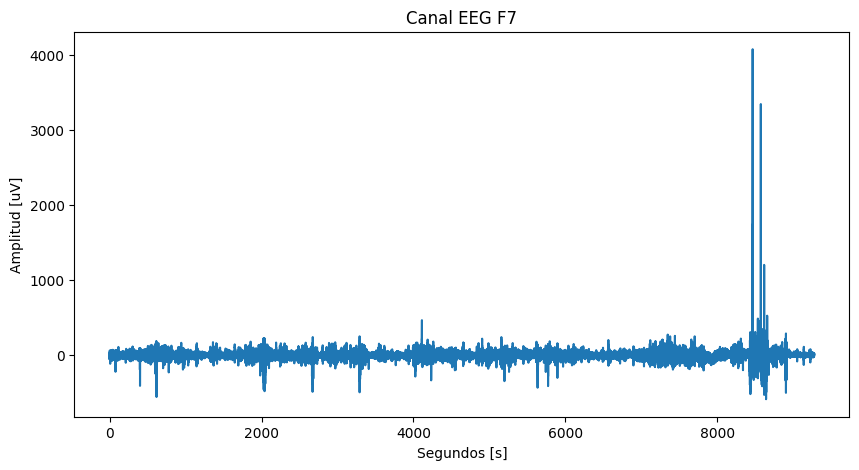

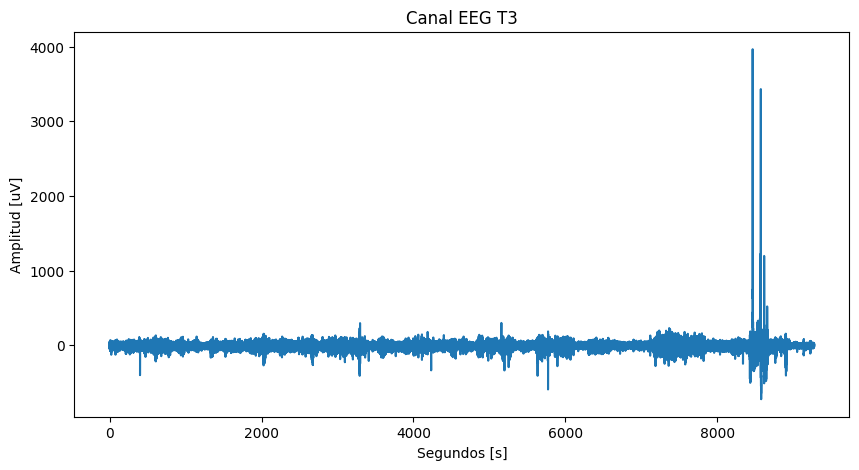

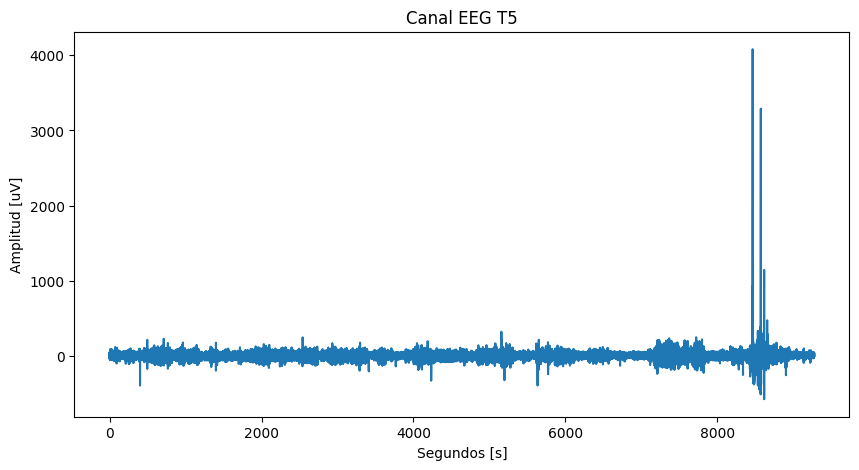

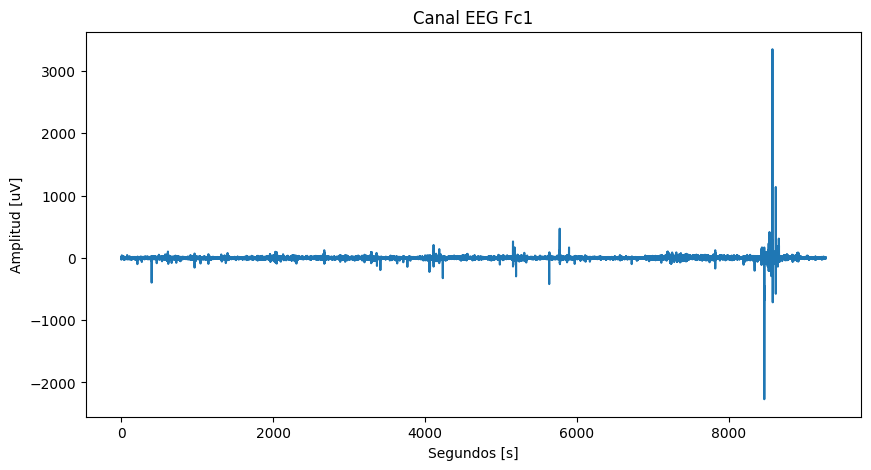

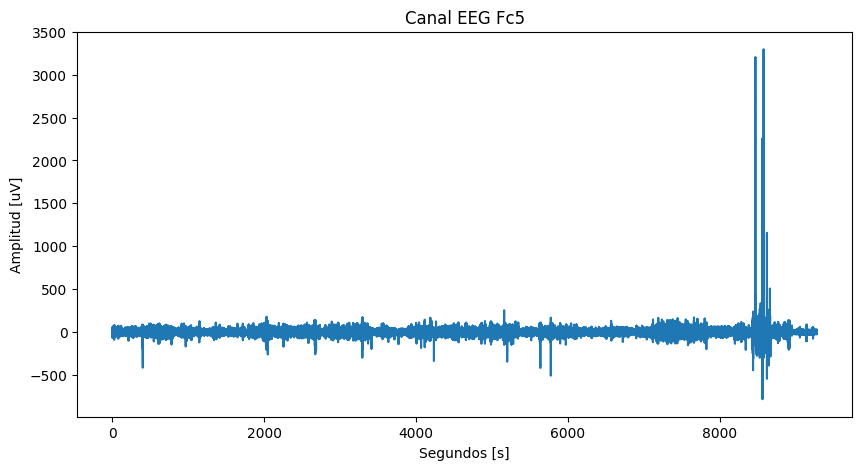

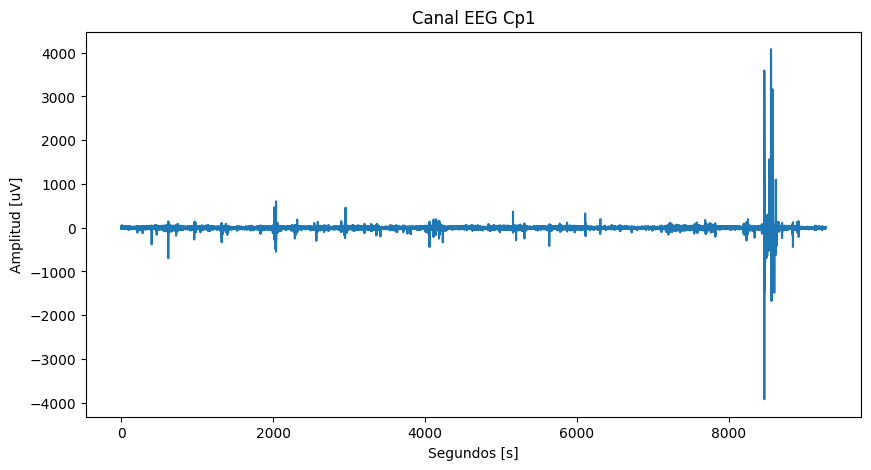

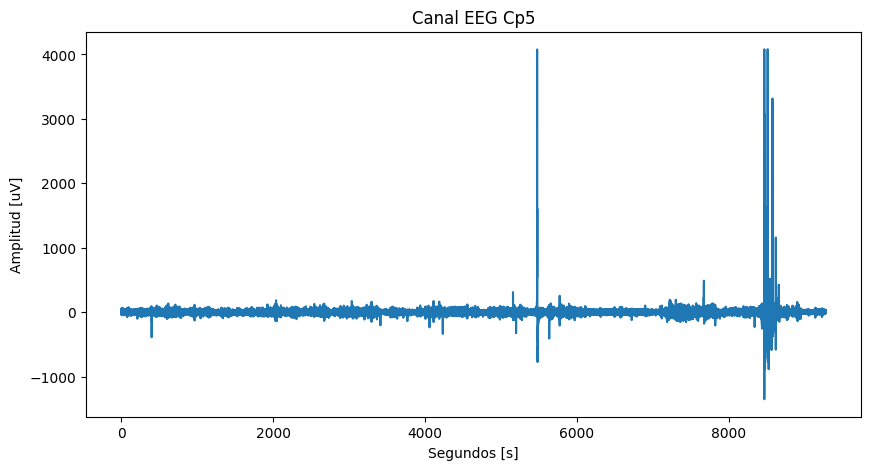

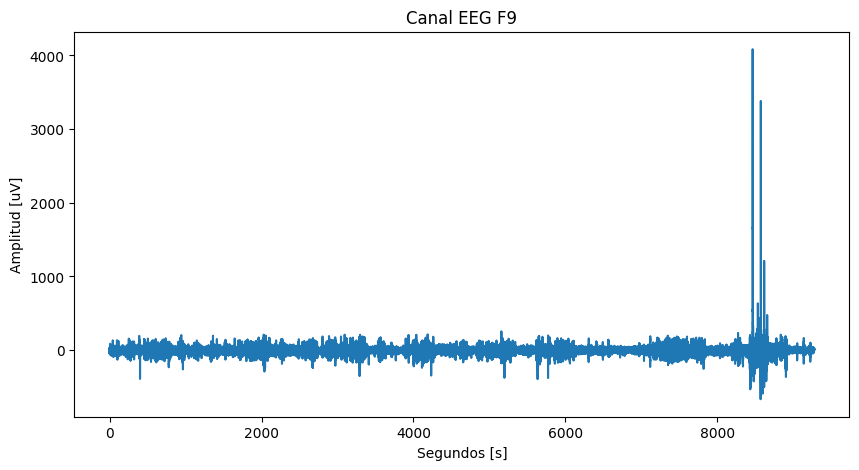

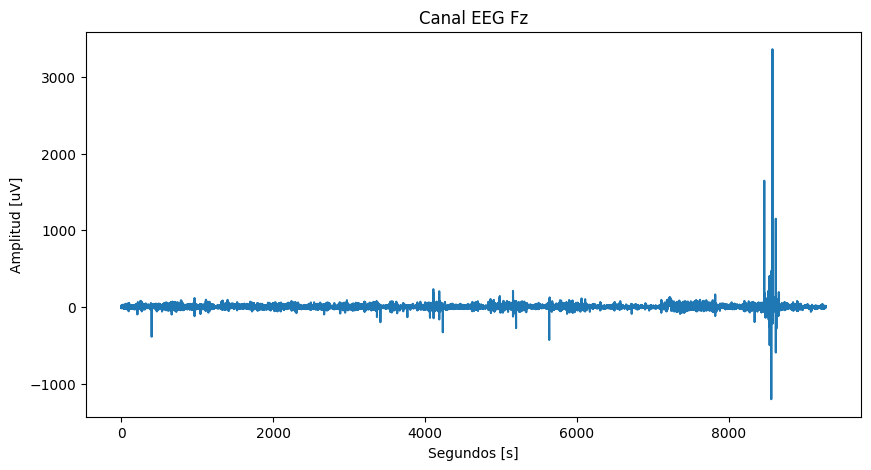

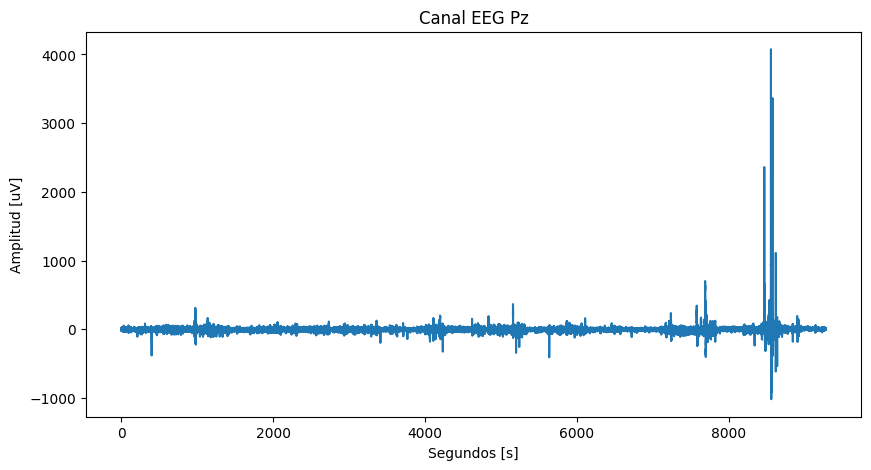

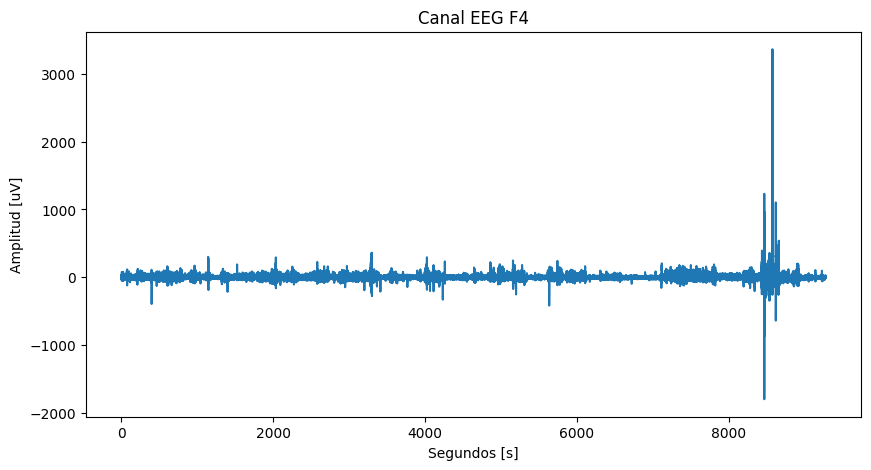

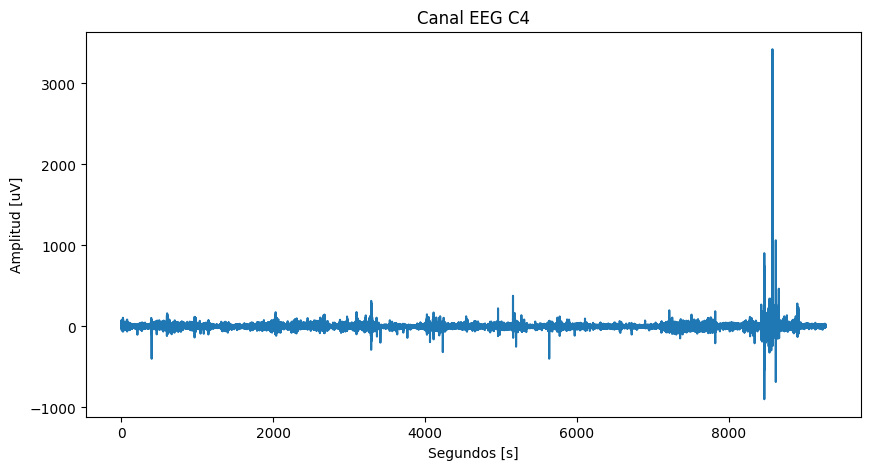

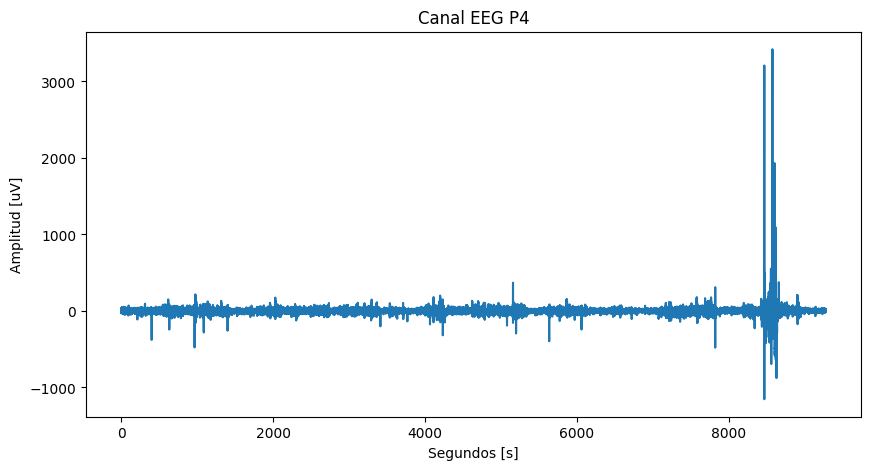

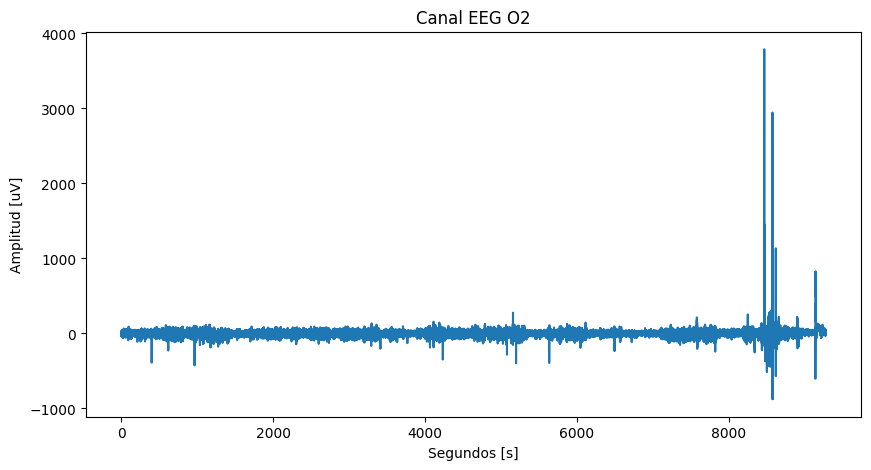

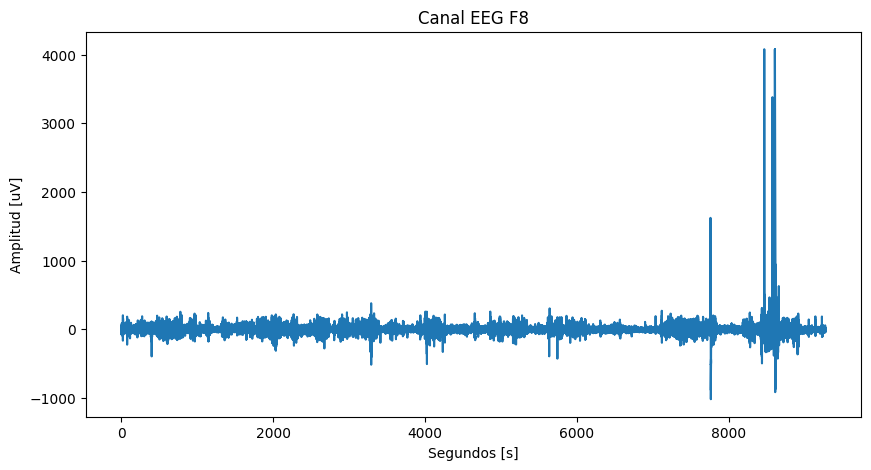

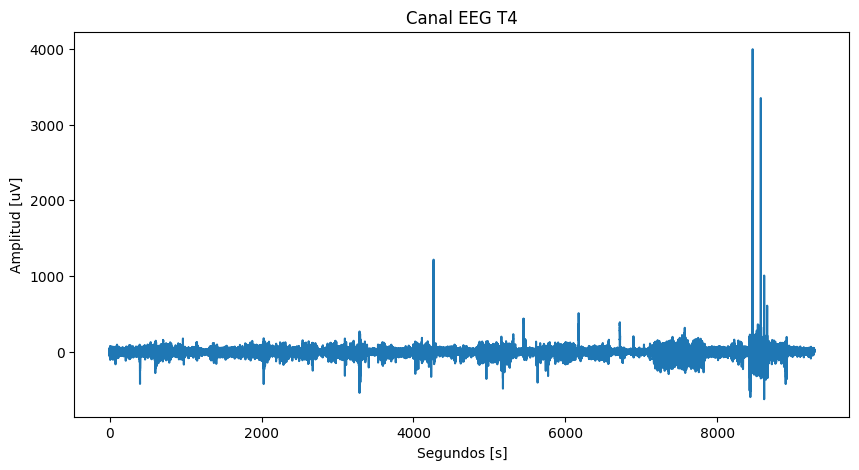

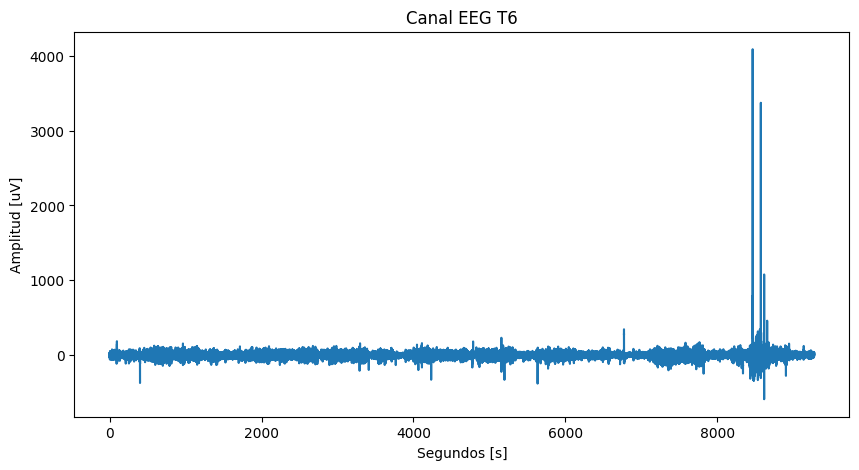

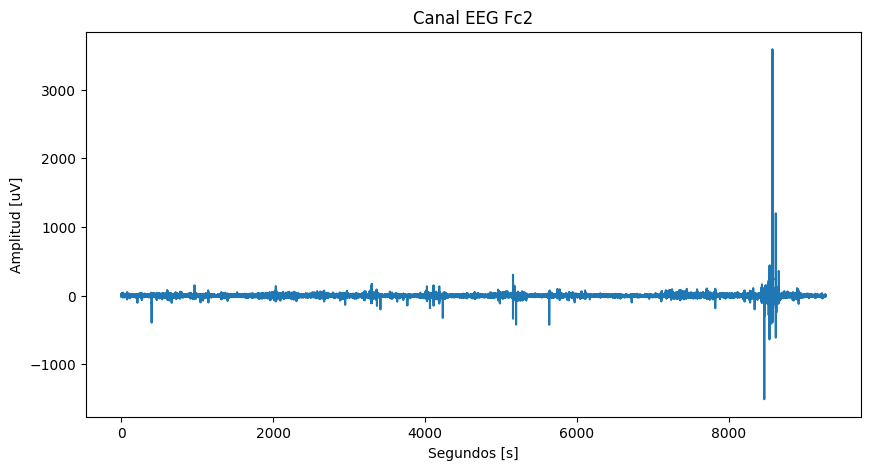

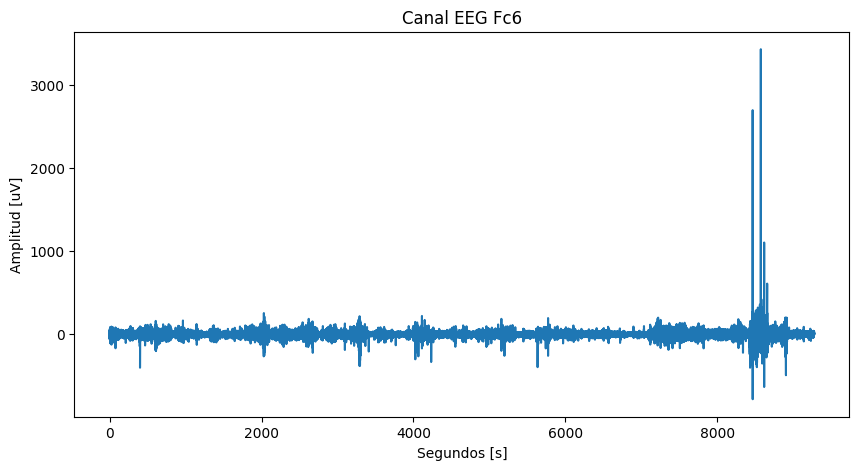

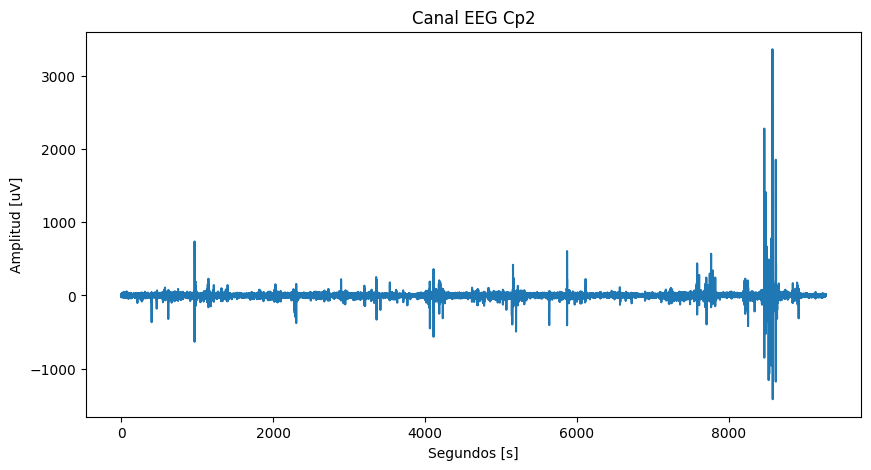

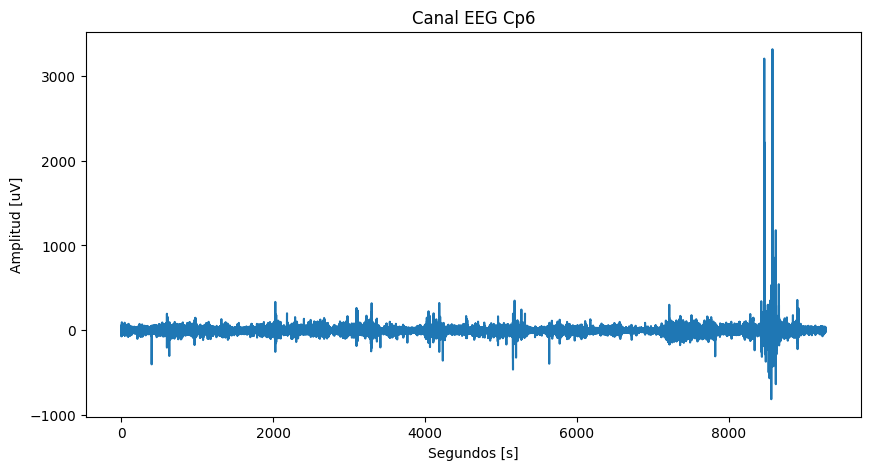

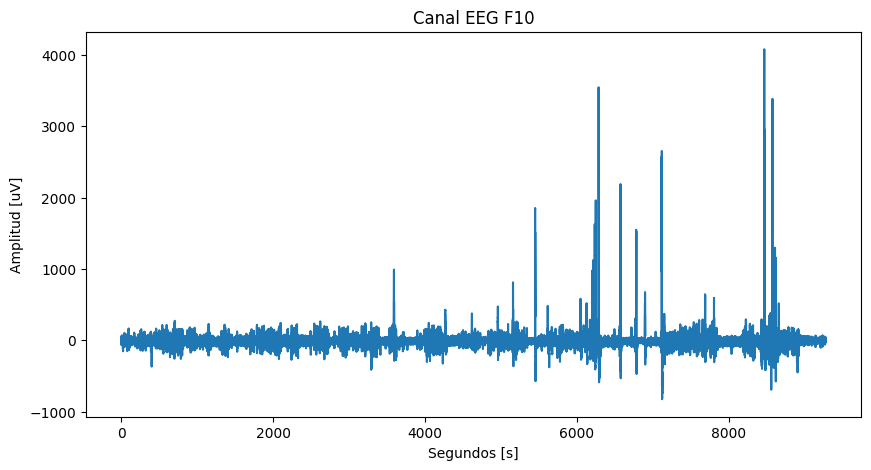

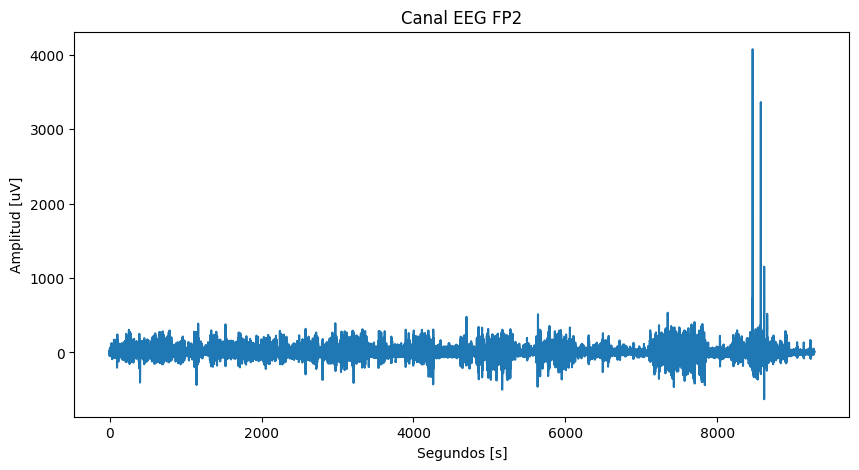

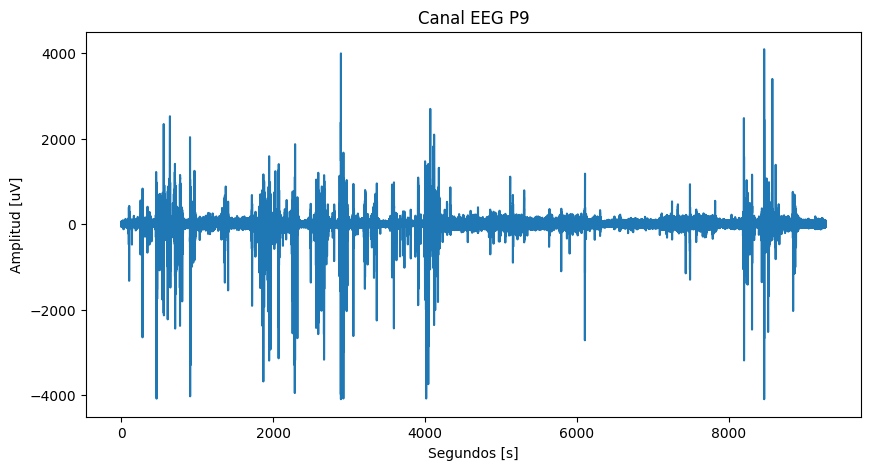

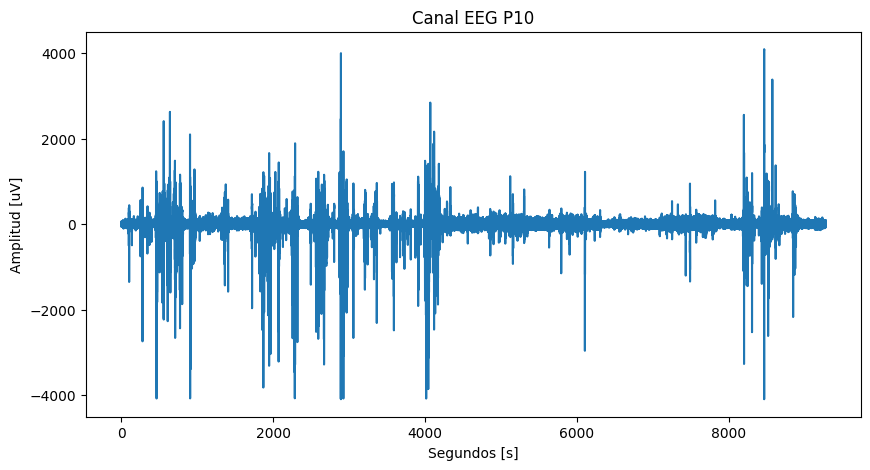

In [ ]:
# Graficar cada canal de EEG presente
for i, ch_name in enumerate(eeg_present):
    ch_data = data[i] * 1e6  # Convertir a microvoltios
    t = np.linspace(0, len(ch_data) / fs, len(ch_data))

    plt.figure(figsize=(10, 5))
    plt.plot(t, ch_data)
    plt.title(f'Canal {ch_name}')
    plt.xlabel('Segundos [s]')
    plt.ylabel('Amplitud [uV]')
    plt.show()

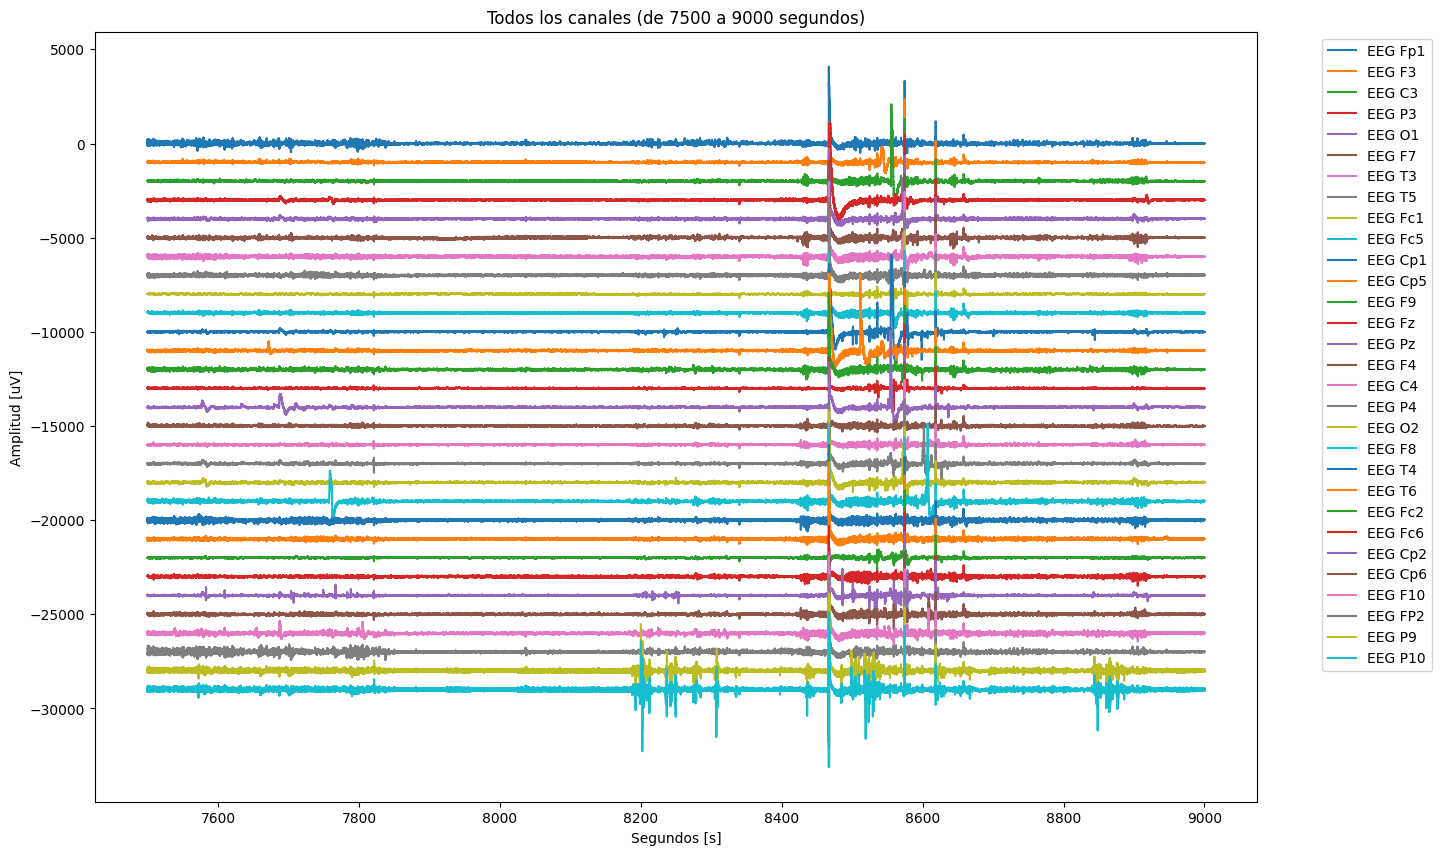

In [ ]:

start_time = 7500
start_sample = int(start_time * fs)

delta_T = 1500
end_sample = start_sample + int(delta_T * fs)

t = np.linspace(start_time, start_time + delta_T, int(delta_T * fs))
plt.figure(figsize=(15, 10))

for i, ch in enumerate(data):
    x = ch[start_sample:end_sample] * 1e6
    plt.plot(t, x - i * 1000, label=f"{eeg_present[i]}")

# Configurar título, leyenda y etiquetas
plt.title(f'Todos los canales (de {start_time} a {start_time + delta_T} segundos)')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.show()


Gráfico mariposa


En un gráfico mariposa, cada traza corresponde a la señal de un canal individual, y todas las trazas se superponen en el mismo sistema de coordenadas. Esto permite observar patrones comunes o actividades sincrónicas en las diferentes partes del cerebro que se están midiendo

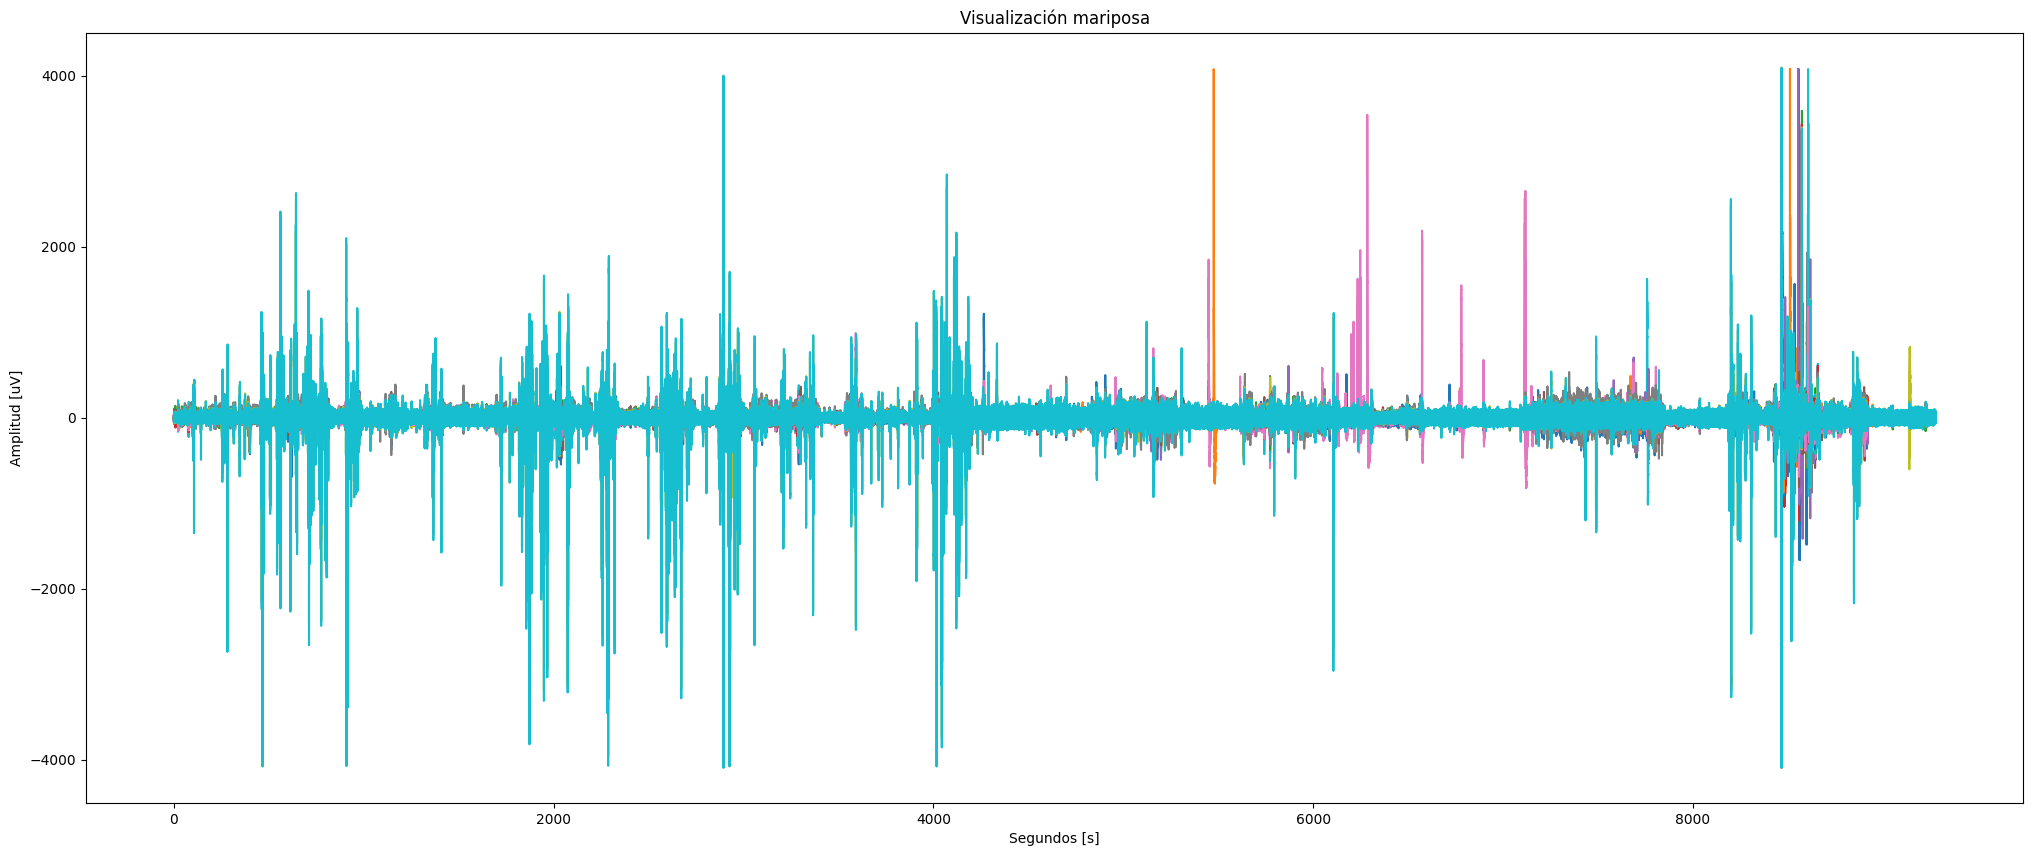

In [ ]:
# Crear el gráfico mariposa
plt.figure(figsize=(25, 10))
t = np.linspace(0, data.shape[1] / fs, data.shape[1])
for ch_data in data:
    plt.plot(t, ch_data * 1e6)  # Convertir a microvoltios

plt.title('Visualización mariposa')
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.show()

### Estimadores

La FFT convierte una señal en el dominio del tiempo en una representación en el dominio de la frecuencia. La FFT permite identificar las frecuencias presentes en la señal y sus respectivas amplitudes. Esto es esencial para detectar y analizar ritmos específicos en señales EEG.

La PSD es una medida de la potencia contenida en una señal en función de la frecuencia, proporcionando una idea de cómo la potencia de la señal está distribuida a lo largo de las diferentes frecuencias.

El método de Welch es una técnica mejorada para estimar la PSD que divide la señal en segmentos superpuestos, calcula la FFT de cada segmento, y luego promedia los resultados. Esto reduce la varianza de la estimación de la PSD.



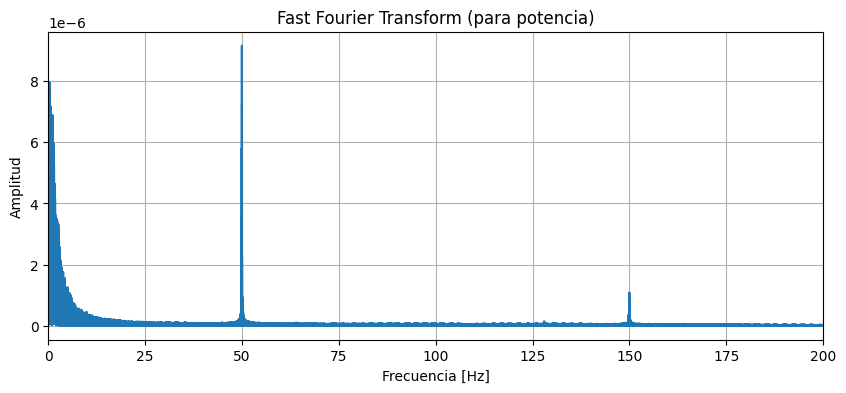

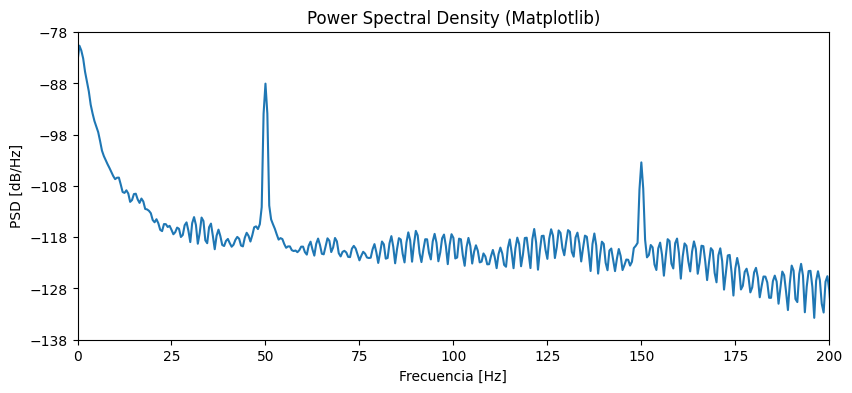

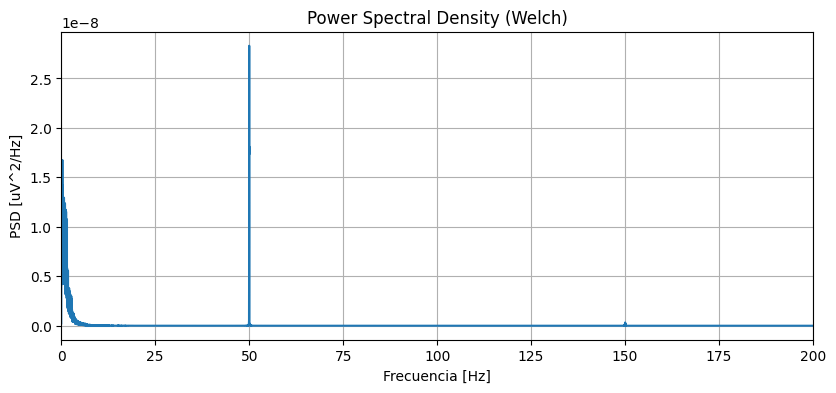

In [ ]:

canal = 29  # Índice del canal (1-based index)
ch_data = data[canal - 1]  # Convertir a 0-based index

# Calcular la FFT
canal_fft = fft(ch_data)
canal_fft = canal_fft[:len(canal_fft) // 2]
L = len(canal_fft)

f = np.linspace(0, fs / 2, L)
y = 2.0 / L * np.abs(canal_fft)

plt.figure(figsize=(10, 4))
plt.title('Fast Fourier Transform (para potencia)')
plt.plot(f, y)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim([0,200])
plt.grid()
plt.show()

# Calcular la PSD usando matplotlib
plt.figure(figsize=(9.7, 4))
plt.title('Power Spectral Density (Matplotlib)')
plt.psd(ch_data, Fs=fs, NFFT=2**10)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.xlim([0,200])
plt.grid()
plt.show()

# Calcular la PSD usando el método de Welch
nper = len(ch_data) //25
f, Pxx_den = welch(ch_data, fs, noverlap=nper// 2, nperseg=nper)


plt.figure(figsize=(9.7, 4))
plt.plot(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [uV^2/Hz]')
plt.xlim([0,200])
plt.title('Power Spectral Density (Welch)')
plt.grid()

plt.show()

### Espectrograma

El espectrograma generado muestra cómo la potencia de las diferentes frecuencias de la señal EEG varía a lo largo del tiempo. Las áreas de mayor intensidad en el gráfico indican la presencia de componentes de frecuencia más fuertes en esos momentos.

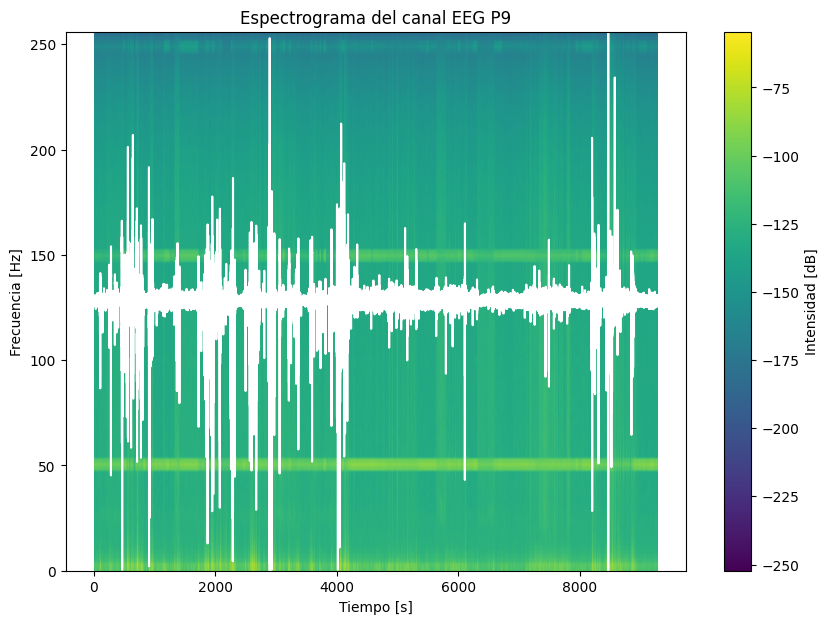

In [ ]:
canal = 28
plt.figure(figsize=(10, 7))
spectrum, fr, ti, im = plt.specgram(data[canal], Fs=fs)
plt.colorbar(im).set_label('Intensidad [dB]')


t = np.linspace(0, len(data[canal]) / fs, len(data[canal]))

max_freq = np.max(fr)
normalized_data = (data[canal] - np.min(data[canal])) / (np.max(data[canal]) - np.min(data[canal]))  # Normalizar la señal entre 0 y 1
scaled_data = normalized_data * max_freq

plt.plot(t, scaled_data, 'white')

plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title(f'Espectrograma del canal {eeg_present[canal]}')
plt.show()



En la figura se ve una banda encendida en 50Hz, la cual corresponde a ruido de linea. Además se ve presente la componente armonica en 150Hz. Estos ruidos deben ser eliminados para que el analisis de la señal sea más eficiente.

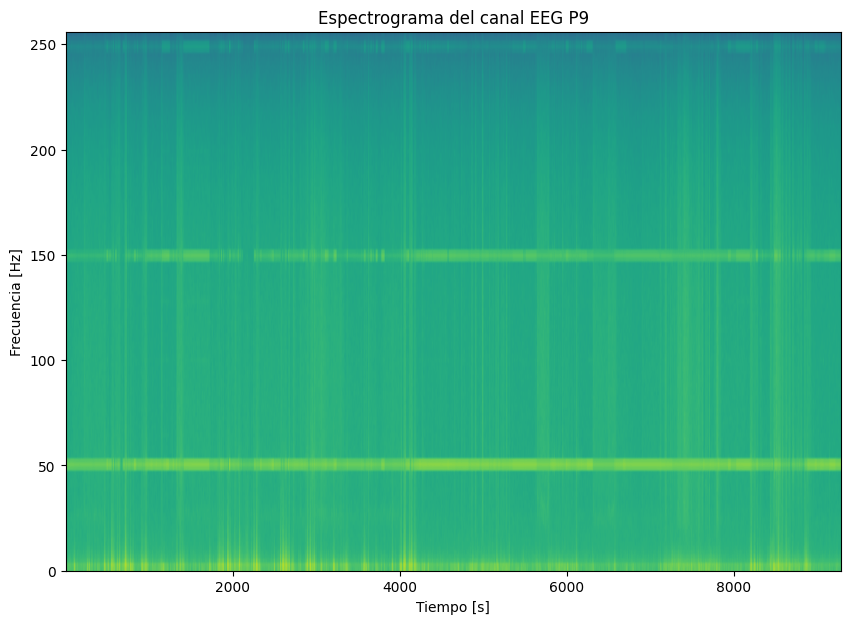

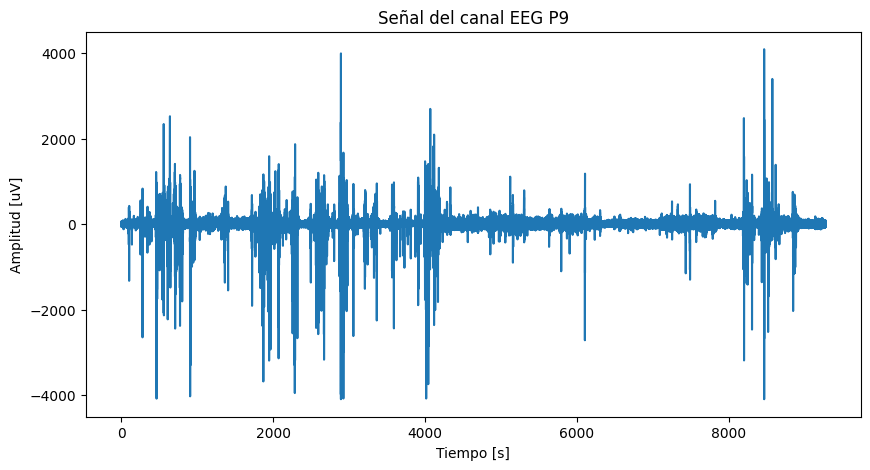

In [ ]:

canal = 28
plt.figure(figsize=(10, 7))
plt.specgram(data[canal], Fs=fs)
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title(f'Espectrograma del canal {eeg_present[canal]}')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, data[canal] * 1e6)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [uV]')
plt.title(f'Señal del canal {eeg_present[canal]}')
plt.show()

### Acondicionamiento: Eliminar ruido

Para eliminar el ruido de línea de 50 Hz en la señal, se aplica un filtro notch. Este tipo de ruido proviene principalmente de la interferencia de la red eléctrica. Al usar el filtro notch, también es crucial tener en cuenta sus armónicos. Los armónicos son componentes de frecuencia que son múltiplos enteros de una frecuencia fundamental, en este caso se observa un armónico en 150 Hz.
 Los filtros notch están diseñados para suprimir una frecuencia específica, pero tienen un ancho de banda finito. Es importante que el ancho de banda del filtro sea lo suficientemente estrecho para cubrir completamente el armónico y sus efectos, de lo contrario, es posible que el armónico no se elimine por completo. Es por esto que se aplican dos filtros para eliminar ambos ruidos.

In [ ]:
fs = 512
line_freq = 50
#filtro Notch para eliminar el ruido de línea a 50 Hz
b, a = iirnotch(w0=line_freq, Q=line_freq/2, fs=fs)
filtered_data = []
for canal in data:
  filtered_data.append(filtfilt(b, a, canal))

#aplico otro filtro para 150Hz
line_freq2=150
b2,a2= iirnotch(w0=line_freq2, Q=line_freq2/2, fs=fs)
filtered2=[]
for canal in filtered_data:
  filtered2.append(filtfilt(b2,a2,canal))

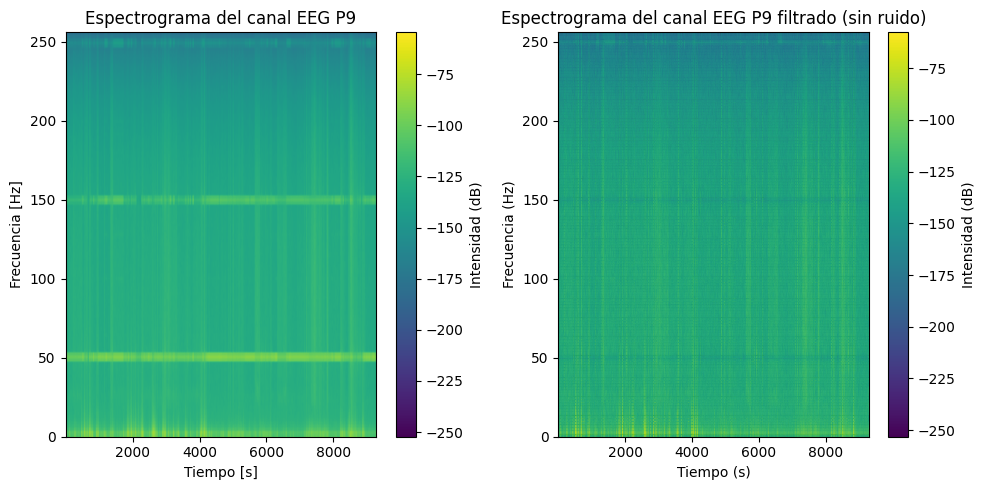

In [ ]:
canal = 28
plt.figure(figsize=(10, 5))

# Espectrograma del canal antes de filtrar
plt.subplot(1, 2, 1)
plt.specgram(data[canal], Fs=fs)
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title(f'Espectrograma del canal {eeg_present[canal]}')
plt.colorbar(label='Intensidad (dB)')

# Espectrograma del canal después de filtrar
plt.subplot(1, 2, 2)
frequencies, times, Sxx = spectrogram(filtered2[canal], fs=fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title(f'Espectrograma del canal {eeg_present[canal]} filtrado (sin ruido)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')

plt.colorbar(label='Intensidad (dB)')

plt.tight_layout()
plt.show()


### Segmentacion

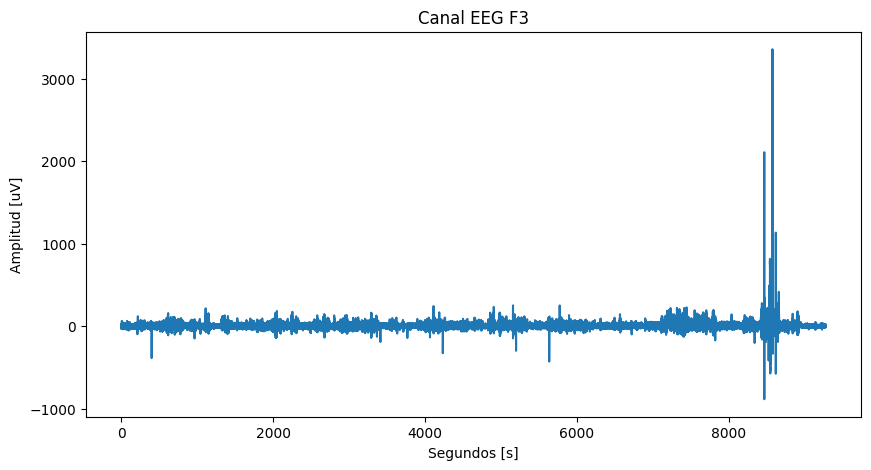

In [ ]:
canal = 1

señal = data[canal] * 1e6
t = np.linspace(0, len(señal) / fs, len(señal))

plt.figure(figsize=(10, 5))
plt.plot(t, señal)
plt.title(f'Canal {eeg_present[canal]}')
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.show()

Periodograma movil

El periodograma móvil se utiliza para obtener una representación espectral de una señal a lo largo del tiempo. Se calcula dividiendo la señal en segmentos y calculando el periodograma (densidad espectral de potencia) de cada segmento. Esto permite observar cómo cambia la distribución de la potencia en diferentes frecuencias con el tiempo.
Para esto se calcula el coeficiente de autocorrelación ya que
la densidad espectral de potencia de una señal es la transformada de Fourier de su función de autocorrelación.
El coeficiente de autocorrelación mide la similitud de una señal consigo misma en diferentes retrasos de tiempo. En el contexto de la detección de convulsiones, el coeficiente de autocorrelación puede ser útil para identificar patrones repetitivos o cambios abruptos que podrían indicar el inicio o fin de una convulsión.


In [ ]:
def periodograma(fs, señal):
  N_win = fs
  N_senal = señal.shape[0]

  s_0 = señal[:N_win]
  r_0 = np.correlate(s_0,s_0,mode='full')
  r_0.shape

  r_0/r_0.shape[0]
  r_0[len(r_0)//2]
  len(r_0)
  N_senal = señal.shape[0]
  N_win = int(fs)

  porcentaje = 0.75
  paso =  int((1-porcentaje)*N_win)

  s_0 = señal[:N_win]
  R_0 = np.correlate(s_0,s_0,mode='full')/s_0.shape[0]
  R_00 = R_0[int(R_0.shape[0]/2)]
  delta = []

  for i in range(N_win, N_senal-N_win, paso):
    s_N = señal[i:i+N_win]
    R_N = np.correlate(s_N,s_N,mode='full')/s_N.shape[0]
    R_N0 = R_N[int(R_N.shape[0]/2)]
    d = np.sum((R_N-R_0)**2)/(R_N0*R_00)
    delta.append(d)
  len(delta)
  señal.shape
  delta = delta/max(delta)
  señal = señal/max(señal)
  return delta, señal


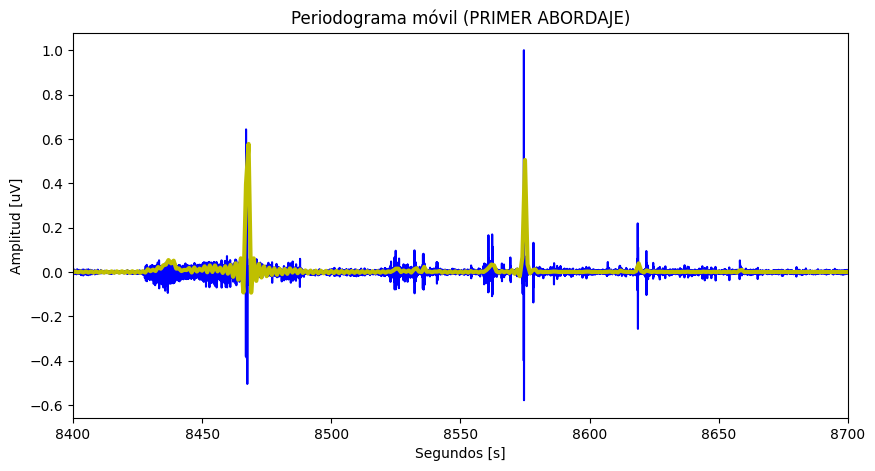

In [ ]:
delta, señal=periodograma(fs, señal)
delta_0 = scipy.signal.resample(delta, int(señal.shape[0]/fs))
plt.figure(figsize=(10,5))
plt.title('Periodograma móvil (PRIMER ABORDAJE)')
plt.plot(t,señal,'b')
plt.plot(delta_0,'y',linewidth=3)
plt.xlim([8400,8700])
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.show()

## Analisis de las convulsiones

### Filtrado

Un filtro FIR (Finite Impulse Response) pasa banda se aplica para permitir el paso de componentes de frecuencia dentro del rango específico (la banda de paso) y atenuar (reducir) las componentes de frecuencia fuera de este rango.
Las señales EEG contienen información en diferentes bandas de frecuencia, cada una asociada con diferentes estados cerebrales. Al aplicar un filtro pasa banda(8-13 Hz) FIR, podemos aislar esta banda para analizar sus características específicas sin la interferencia de otras frecuencias.

La banda alfa (8-13 Hz) está relacionada con la actividad cerebral en estado de vigilia relajada y se considera importante para el procesamiento de la información y la regulación de la atención. En el contexto de la epilepsia, cambios en la actividad alfa pueden ser indicativos de la inminencia de una convulsión.


In [ ]:
nyq = 0.5 * fs
low = 8 / nyq
high = 13 / nyq
fir_filter = firwin(101, [low, high], pass_zero=False)


filtered_eeg = []
for channel in filtered_data:
    filtered_channel = lfilter(fir_filter, 1.0, channel)
    filtered_eeg.append(filtered_channel)

filtered_eeg=np.array(filtered_eeg)


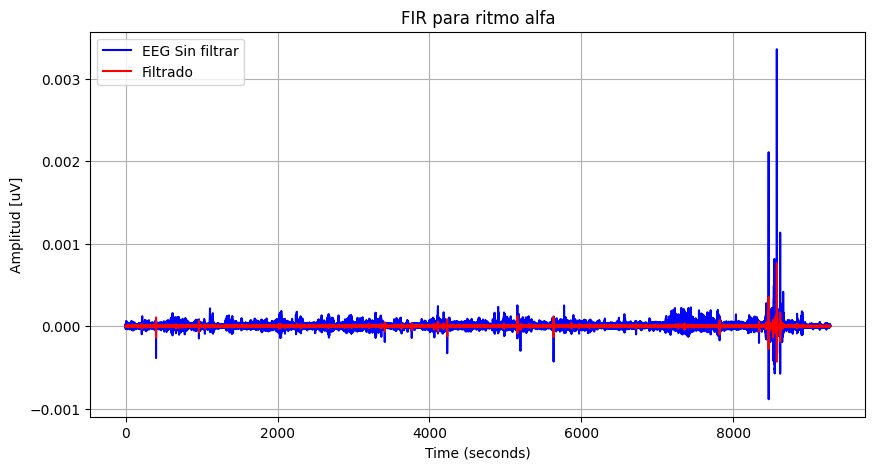

In [ ]:
channel_index = 1

time = np.arange(len(data[channel_index])) / fs
plt.figure(figsize=(10, 5))

# Plot unfiltered EEG
plt.plot(time, data[channel_index], label='EEG Sin filtrar', color='blue')

# Plot filtered EEG
plt.plot(time, filtered_eeg[channel_index], label='Filtrado', color='red')

plt.title('FIR para ritmo alfa')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitud [uV]')
plt.legend()
plt.grid(True)
plt.show()


### Marcador

En la base de datos se proporciona la tabulacion de los tiempos en los que inicia y termina la convulsion.
Estos tiempos se agregaron a la señal, para poder visualizar cuales son los picos de interes, y así entender como alcanzar el objetivo del informe.

Inicio convulsion: 8420
Fin convulsion:  8490


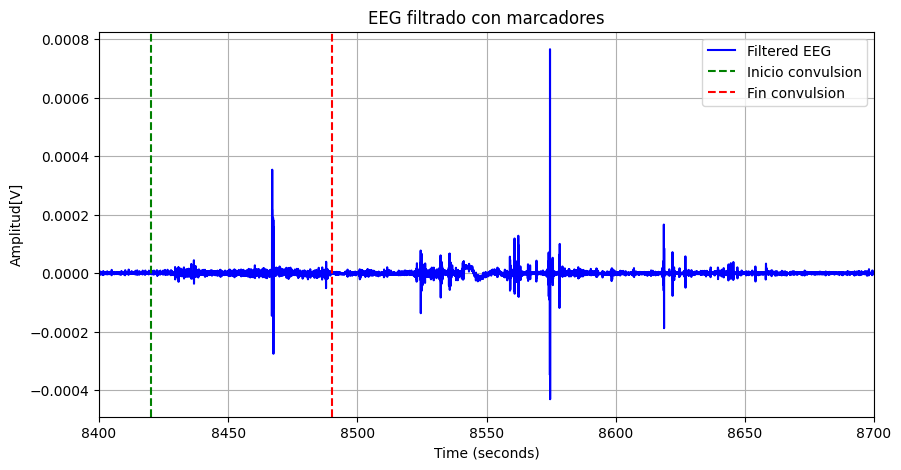

In [ ]:
channel_index = 1

time = np.arange(len(data[channel_index])) / fs
plt.figure(figsize=(10, 5))

plt.plot(time, filtered_eeg[channel_index], label='Filtered EEG', color='blue')

def time_to_seconds(hours, minutes, seconds):
    return hours * 3600 + minutes * 60 + seconds

registration_start_time = time_to_seconds(20, 14, 28)
registration_end_time = time_to_seconds(22, 49, 5)
seizure_start_time = time_to_seconds(22, 34, 48)
seizure_end_time = time_to_seconds(22, 35, 58)

seizure_start_time = seizure_start_time-registration_start_time
plt.axvline(seizure_start_time, linestyle='--', color='green', label='Inicio convulsion')
seizure_end_time = seizure_end_time-registration_start_time
plt.axvline(seizure_end_time, linestyle='--', color='red', label='Fin convulsion')

print('Inicio convulsion:',seizure_start_time)
print('Fin convulsion: ', seizure_end_time)

plt.title('EEG filtrado con marcadores')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitud[V]')
plt.xlim([8400,8700])
plt.legend()
plt.grid(True)
plt.show()


## Predicción de convulsión

Seleccionando un canal de la región afectada del paciente de la señal filtrada, se define una función para calcular la energía de la señal, que es la suma de los cuadrados de los valores de la señal en una ventana temporal específica. La energía se utiliza porque es una medida que refleja la potencia de la señal en un período de tiempo determinado. Las convulsiones suelen estar asociadas con incrementos significativos en la energía de la señal EEG, por lo que este análisis es útil para detectar estos eventos.

La señal EEG se divide en ventanas de 1 segundo por la fecuencia de muestreo. El tamaño de la ventana se elige para proporcionar un balance entre la resolución temporal y la estabilidad del cálculo de energía. Ventanas más pequeñas pueden ser demasiado sensibles al ruido, mientras que ventanas más grandes pueden perder detalles importantes. Cada ventana se procesa individualmente para calcular su energía, y estos valores se almacenan en un arreglo.

A su vez se calcula un umbral dinámico para la energía, que se define como la media de la energía más tres veces la desviación estándar. Este umbral se utiliza para identificar picos en la energía que pueden indicar el inicio de una convulsión. Segun el paciente este umbral se modifica para que sea acorde a la magnitud de la señal.

Detección de convulsiones:
El código recorre la serie temporal de energías para detectar segmentos que superan el umbral y que pueden corresponder a convulsiones. Se establecen criterios adicionales, como una duración mínima  y máxima para las convulsiones, así como un intervalo mínimo entre convulsiones consecutivas, para asegurar que los eventos detectados sean válidos y para evitar falsas detecciones.

Marcado de inicio y fin de convulsiones:
Cuando se detecta que la energía supera el umbral y se cumplen las condiciones de duración e intervalo, se marca el inicio y el fin de la convulsión. Estos puntos se registran para su posterior análisis y visualización.

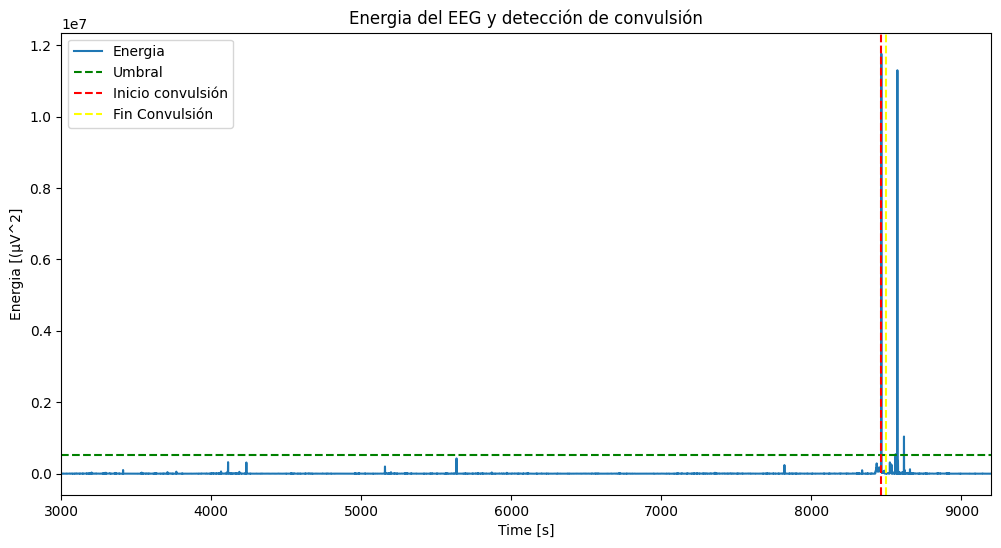

Inicio convulsión: [8466.0]
Fin convulsión: [8496.0]


In [ ]:
canal = 23
señal = filtered_eeg[canal] * 1e6

def compute_energy(signal):
    return np.sum(signal ** 2)

window_size = int(fs*1)
energy = []

for i in range(0, len(señal), window_size):
    window = señal[i:i + window_size]
    energy.append(compute_energy(window))

energy = np.array(energy)
umbral = np.mean(energy) + 3 * np.std(energy)

min_duration = 30
max_duration = 2 * 60
min_interval = 5 * 60

seizure_starts = []
seizure_ends = []
in_seizure = False
start_idx = 0
last_seizure_end = -min_interval

for i in range(len(energy)):
    if energy[i] > umbral and not in_seizure and (i * window_size / fs - last_seizure_end) >= min_interval:
        start_idx = i
        in_seizure = True
    elif energy[i] < umbral and in_seizure:
        duration = (i - start_idx) * window_size / fs
        if min_duration <= duration <= max_duration:
            seizure_starts.append(start_idx * window_size / fs)
            seizure_ends.append(i * window_size / fs)
            last_seizure_end = i * window_size / fs
            in_seizure = False

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(energy)) * window_size / fs, energy, label='Energia')
plt.axhline(y=umbral, color='g', linestyle='--', label='Umbral')

for start in seizure_starts:
    plt.axvline(x=start, color='r', linestyle='--', label='Inicio convulsión')
for end in seizure_ends:
    plt.axvline(x=end, color='yellow', linestyle='--', label='Fin Convulsión')

plt.xlabel('Time [s]')
plt.ylabel('Energia [(µV^2]')
plt.xlim([3000,9200])
plt.legend()
plt.title('Energia del EEG y detección de convulsión')
plt.show()

print("Inicio convulsión:", seizure_starts)
print("Fin convulsión:", seizure_ends)



La máxima potencia en el espectro de la PSD puede indicar la presencia de eventos anómalos, como una convulsión en una señal EEG. Detectar el pico de máxima potencia y su frecuencia asociada puede ayudar a identificar estos eventos.

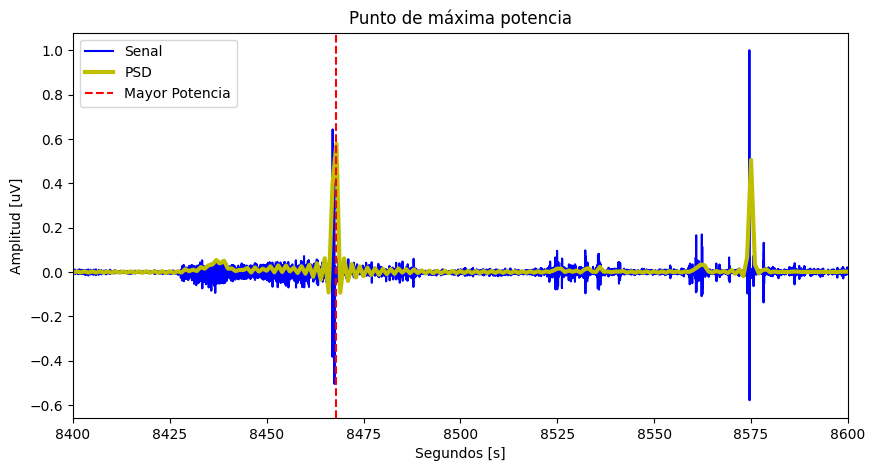

Maxima potencia 8468


In [ ]:
canal=23
señal = filtered_eeg[canal] * 1e6
delta,señal = periodograma(fs, señal)

delta_0 = scipy.signal.resample(delta, int(señal.shape[0]/fs))
t = np.linspace(0, len(señal) / fs, len(señal))
plt.figure(figsize=(10,5))
plt.title('Punto de máxima potencia')
plt.plot(t,señal,'b',label='Senal')
plt.plot(delta_0,'y',linewidth=3,label='PSD')

max_index = np.argmax(delta_0)

plt.axvline(x=max_index, color='r', linestyle='--', label='Mayor Potencia')

plt.xlim([8400,8600])
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.legend()
plt.show()
print('Maxima potencia',max_index)

## Resultados

### Obtenidos

In [ ]:
seizure_starts=seizure_starts[0]
seizure_ends=seizure_ends[0]
print('Inicio convulsion:')
error_absoluto = abs(seizure_start_time  - seizure_starts)
print(f"Error Absoluto: {error_absoluto:.2f} segundos")

# Cálculo del Error Relativo
error_relativo = abs(seizure_start_time -seizure_starts) / abs(seizure_start_time)
print(f"Error Relativo: {error_relativo:.2%}")

print('Fin convulsion:')
# Cálculo del Error Absoluto
error_absoluto = abs(seizure_end_time  - seizure_ends)
print(f"Error Absoluto: {error_absoluto:.2f} segundos")

# Cálculo del Error Relativo
error_relativo = abs(seizure_end_time -seizure_ends) / abs(seizure_end_time)
print(f"Error Relativo: {error_relativo:.2%}")




Inicio convulsion:
Error Absoluto: 46.00 segundos
Error Relativo: 0.55%
Fin convulsion:
Error Absoluto: 6.00 segundos
Error Relativo: 0.07%


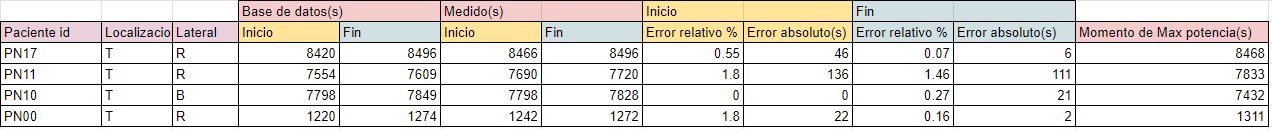

### EEG Synchronization Analysis for Seizure Prediction

El documento concluye que el análisis de sincronización de EEG puede ser útil para la predicción de convulsiones epilépticas y que el algoritmo ModThAlgo, junto con el procedimiento de postprocesamiento, puede ser una herramienta efectiva para este fin.

Estos resultados sugieren que el análisis de sincronización de EEG tiene el potencial para ser utilizado en la predicción de convulsiones epilépticas, lo que podría tener implicaciones importantes para el desarrollo de dispositivos de monitoreo y control no invasivos para pacientes epilépticos.


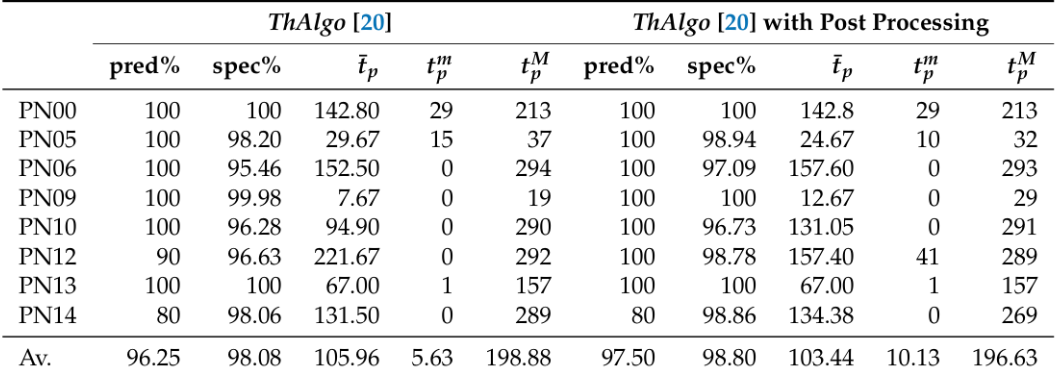

## Conclusiones

 Los resultados obtenidos mediante autocorrelación y PSD son de facil interpretación y permiten a los clínicos entender el comportamiento de la señal en términos de frecuencias y patrones temporales.

Aunque el método detecta convulsiones de manera razonable, no alcanza la precisión de técnicas de aprendizaje automático.
 Debido a que este método no se adapta automáticamente a las características específicas de cada paciente, ya que los umbrales y parámetros establecidos presentan variaciones individuales en cada señal de EEG.

En conclusión, el enfoque basado en la autocorrelación y la densidad espectral de potencia proporciona una herramienta útil y accesible para la detección de convulsiones en señales EEG, con un nivel de precisión aceptable. Sin embargo, en escenarios donde se dispone de grandes conjuntos de datos y recursos computacionales, los modelos de aprendizaje automático presentan una alternativa más precisa y adaptable.